In [2]:
import os
import pandas as pd
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FeatureSelection.csv to FeatureSelection.csv


In [ ]:
df1 = pd.read_csv('FeatureSelection.csv')
print(df1.shape)
df1

(8, 22)


,Time,Acceleration average,Maximum acceleration,Minimum acceleration,Acceleration maximum/minimum difference,Acceleration variance,Tilt Magnitude,Tilt variance,Gyro average,Gyro maximum value,...,Gyro variance,Times of still,Times of foot,Times of vehicle,Times of charges,Amount of battery power used in a day,Average illuminance,Average atmospheric pressure,Positive Panas Score,Negative Panas Score
0,Day 1 ends,1.013626,1.034829,0.990976,0.043854,0.012393,0.024149,0.298677,0.142475,0.179635,...,0.079881,0.870787,0.081461,0.022472,0.435393,0.497239,1.285057,1003.371209,20.93080,22.56655
1,Day 2 ends,1.033093,1.127889,0.926768,0.201121,0.072114,0.051593,1.554142,0.647561,0.867628,...,0.292481,0.614334,0.283276,0.023891,0.068259,0.670068,-5.554557,1003.789926,19.45954,36.44756
2,Day 3 ends,1.013571,1.037183,0.987211,0.049972,0.016945,0.034188,0.441379,0.202630,0.249627,...,0.148151,0.788679,0.101887,0.026415,0.302239,0.700858,0.450915,999.822242,14.16849,25.77539
3,Day 4 ends,1.009610,1.018362,0.999855,0.018506,0.005239,0.019353,0.141028,0.076808,0.094081,...,0.058183,0.923729,0.031780,0.052966,0.233051,0.780720,-7.582158,998.823805,11.76655,38.48353
4,Day 5 ends,1.011286,1.039943,0.978465,0.061479,0.016265,0.027651,0.419358,0.224050,0.287205,...,0.129212,0.821053,0.100000,0.305263,0.084211,0.680105,-5.930536,1006.267928,20.59491,35.00618
5,Day 6 ends,1.012972,1.036424,0.986232,0.050193,0.018102,0.030236,0.435622,0.204191,0.251525,...,0.125285,0.826531,0.102041,0.020408,0.102041,0.576684,-0.487709,1001.623450,14.65846,25.42615
6,Day 7 ends,1.010468,1.022505,0.997412,0.025093,0.007806,0.023572,0.226199,0.109716,0.138301,...,0.070074,0.833333,0.043716,0.010929,0.460490,0.629728,-2.554541,998.949804,16.11786,28.54641
7,Day 8 ends,1.011185,1.023753,0.997590,0.026163,0.008996,0.021190,0.207422,0.108245,0.135681,...,0.057022,0.864935,0.031169,0.020779,0.522078,0.630026,0.557710,997.713106,17.63700,25.39086


In [ ]:
df=df1.drop(['Time','Negative Panas Score'],axis=1)
df
md1 = df.median()

stats1 = df.describe()
stats1.loc['median'] = md1

print(stats1)

        Acceleration average  Maximum acceleration  Minimum acceleration  \
count               8.000000              8.000000              8.000000   
mean                1.014476              1.042611              0.983064   
std                 0.007664              0.035367              0.023842   
min                 1.009610              1.018362              0.926768   
25%                 1.011006              1.023441              0.984290   
50%                 1.012129              1.035627              0.989093   
75%                 1.013585              1.037873              0.997457   
max                 1.033093              1.127889              0.999855   
median              1.012129              1.035627              0.989093   

        Acceleration maximum/minimum difference  Acceleration variance  \
count                                  8.000000               8.000000   
mean                                   0.059547               0.019732   
std              

In [ ]:
from scipy import stats
zscr1 = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
print(df[(zscr1 >= 3).all(axis=1)])
#no outliers present
print(df.shape)
df


Empty DataFrame
Columns: [Acceleration average, Maximum acceleration, Minimum acceleration, Acceleration maximum/minimum difference, Acceleration variance, Tilt Magnitude, Tilt variance, Gyro average, Gyro maximum value, Gyro minimum value, Gyro maximum/minimum difference, Gyro variance, Times of still, Times of foot, Times of vehicle, Times of charges, Amount of battery power used in a day, Average illuminance, Average atmospheric pressure, Positive Panas Score]
Index: []
(8, 20)


,Acceleration average,Maximum acceleration,Minimum acceleration,Acceleration maximum/minimum difference,Acceleration variance,Tilt Magnitude,Tilt variance,Gyro average,Gyro maximum value,Gyro minimum value,Gyro maximum/minimum difference,Gyro variance,Times of still,Times of foot,Times of vehicle,Times of charges,Amount of battery power used in a day,Average illuminance,Average atmospheric pressure,Positive Panas Score
0,1.013626,1.034829,0.990976,0.043854,0.012393,0.024149,0.298677,0.142475,0.179635,0.082360,0.097275,0.079881,0.870787,0.081461,0.022472,0.435393,0.497239,1.285057,1003.371209,20.93080
1,1.033093,1.127889,0.926768,0.201121,0.072114,0.051593,1.554142,0.647561,0.867628,0.426463,0.441165,0.292481,0.614334,0.283276,0.023891,0.068259,0.670068,-5.554557,1003.789926,19.45954
2,1.013571,1.037183,0.987211,0.049972,0.016945,0.034188,0.441379,0.202630,0.249627,0.105712,0.143915,0.148151,0.788679,0.101887,0.026415,0.302239,0.700858,0.450915,999.822242,14.16849
3,1.009610,1.018362,0.999855,0.018506,0.005239,0.019353,0.141028,0.076808,0.094081,0.037064,0.057016,0.058183,0.923729,0.031780,0.052966,0.233051,0.780720,-7.582158,998.823805,11.76655
4,1.011286,1.039943,0.978465,0.061479,0.016265,0.027651,0.419358,0.224050,0.287205,0.116034,0.171171,0.129212,0.821053,0.100000,0.305263,0.084211,0.680105,-5.930536,1006.267928,20.59491
5,1.012972,1.036424,0.986232,0.050193,0.018102,0.030236,0.435622,0.204191,0.251525,0.113168,0.138357,0.125285,0.826531,0.102041,0.020408,0.102041,0.576684,-0.487709,1001.623450,14.65846
6,1.010468,1.022505,0.997412,0.025093,0.007806,0.023572,0.226199,0.109716,0.138301,0.060895,0.077406,0.070074,0.833333,0.043716,0.010929,0.460490,0.629728,-2.554541,998.949804,16.11786
7,1.011185,1.023753,0.997590,0.026163,0.008996,0.021190,0.207422,0.108245,0.135681,0.062335,0.073346,0.057022,0.864935,0.031169,0.020779,0.522078,0.630026,0.557710,997.713106,17.63700


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#numerical_cols_1 = df.select_dtypes(include=[np.number]).columns
#numerical_cols_2 = df2.select_dtypes(include=[np.number]).columns
#scaler = StandardScaler()
#df[numerical_cols_1] = scaler.fit_transform(df[numerical_cols_1])
#df2[numerical_cols_2] = scaler.fit_transform(df2[numerical_cols_2])

features_to_scale1 = ['Times of vehicle', 'Times of charges', 'Amount of battery power used in a day', 'Average illuminance', 'Average atmospheric pressure',]
scaler1 = StandardScaler()

features_to_scale = ['Acceleration average', 'Maximum acceleration', 'Minimum acceleration', 'Acceleration maximum/minimum difference', 'Acceleration variance', 'Tilt Magnitude', 'Tilt variance', 'Gyro average', 'Gyro maximum value', 'Gyro minimum value', 'Gyro maximum/minimum difference', 'Gyro variance', 'Times of still', 'Times of foot',]  # Replace with your feature names
scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df[features_to_scale1] = scaler1.fit_transform(df[features_to_scale1])

# Check the scaled data
print(df.head())

   Acceleration average  Maximum acceleration  Minimum acceleration  \
0              0.171000              0.150353              0.878508   
1              1.000000              1.000000              0.000000   
2              0.168661              0.171838              0.826995   
3              0.000000              0.000000              1.000000   
4              0.071346              0.197045              0.707328   

   Acceleration maximum/minimum difference  Acceleration variance  \
0                                 0.138802               0.106972   
1                                 1.000000               1.000000   
2                                 0.172305               0.175046   
3                                 0.000000               0.000000   
4                                 0.235318               0.164869   

   Tilt Magnitude  Tilt variance  Gyro average  Gyro maximum value  \
0        0.148755       0.111561      0.115053            0.110600   
1        1.000000 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X = df.iloc[:, 0:19]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 2.594996699999999
Mean Squared Error (MSE): 8.128417082485866
R² Score: -0.13319236716547445


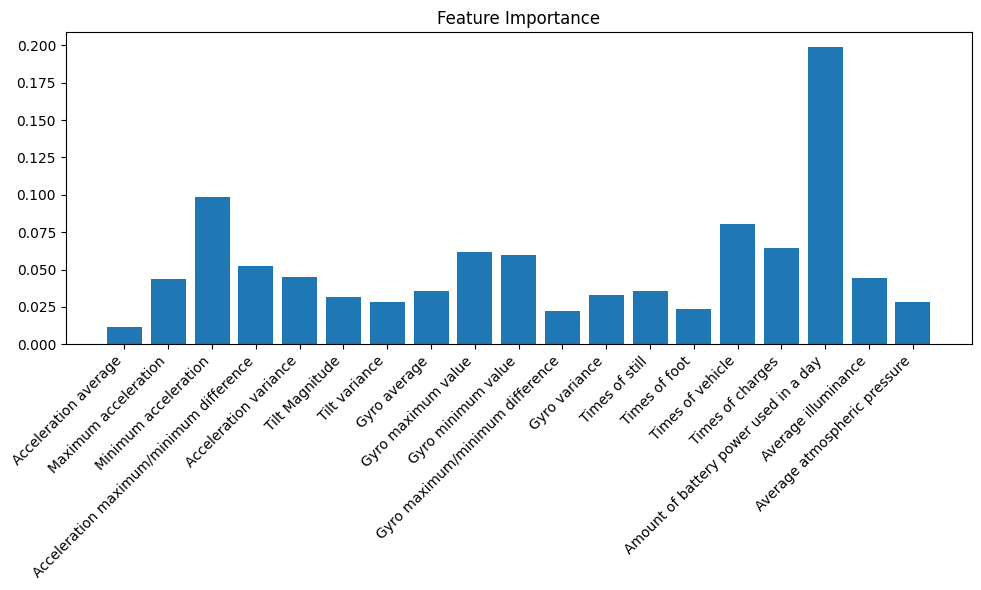

In [ ]:
feature_importances = rf_regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df['PANAS_Change'] = (df['Positive Panas Score'].diff() > 0).astype(int)  # 1 if increased, 0 if not
df_fluctuation = df.dropna()  # Drop the first row where diff() is NaN

# Features (X) and Target (y)
X_fluctuation = df_fluctuation.drop(columns=['Positive Panas Score', 'PANAS_Change'])
y_fluctuation = df_fluctuation['PANAS_Change']

# Split data into training and testing sets
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fluctuation, y_fluctuation, test_size=0.3, random_state=42)

# Train Random Forest for Fluctuation Model
rf_fluctuation = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fluctuation.fit(X_train_f, y_train_f)

# Predict and Evaluate Fluctuation Model
y_pred_f = rf_fluctuation.predict(X_test_f)
print("Fluctuation Model Performance:")
print(classification_report(y_test_f, y_pred_f))
print("Accuracy:", accuracy_score(y_test_f, y_pred_f))

# Step 2: Interval Model - Predict if PANAS Score is higher than individual's average
# Calculate individual averages
average_panas = df['Positive Panas Score'].mean()
df['Above_Avg'] = (df['Positive Panas Score'] > average_panas).astype(int)  # 1 if above average, 0 if not

# Features (X) and Target (y) for Interval Model
X_interval = df.drop(columns=['Positive Panas Score', 'Above_Avg', 'PANAS_Change'])  # Remove unrelated columns
y_interval = df['Above_Avg']

# Split data into training and testing sets
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_interval, y_interval, test_size=0.3, random_state=42)

# Train Random Forest for Interval Model
rf_interval = RandomForestClassifier(n_estimators=100, random_state=42)
rf_interval.fit(X_train_i, y_train_i)

# Predict and Evaluate Interval Model
y_pred_i = rf_interval.predict(X_test_i)
print("\nInterval Model Performance:")
print(classification_report(y_test_i, y_pred_i))
print("Accuracy:", accuracy_score(y_test_i, y_pred_i))

Fluctuation Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Accuracy: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_


Interval Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Fluctuation Model Target
df['PANAS_Change'] = (df['Positive Panas Score'].diff() > 0).astype(int)

# Interval Model Target
average_panas = df['Positive Panas Score'].mean()
df['PANAS_Interval'] = (df['Positive Panas Score'] > average_panas).astype(int)

# Drop NaN (Day 1 has no previous day for fluctuation)
df_fluctuation = df.dropna()

# Features and Targets
X_fluctuation = df_fluctuation[['Positive Panas Score']]  # Replace with actual features
y_fluctuation = df_fluctuation['PANAS_Change']

X_interval = df[['Positive Panas Score']]  # Replace with actual features
y_interval = df['PANAS_Interval']

# Split Data (example with fluctuation model)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fluctuation, y_fluctuation, test_size=0.2, random_state=42)

# Train Random Forest for Fluctuation Model
rf_fluctuation = RandomForestClassifier(random_state=42)
rf_fluctuation.fit(X_train_f, y_train_f)

# Predictions and Evaluation
y_pred_f = rf_fluctuation.predict(X_test_f)
print("Fluctuation Model Performance:")
print(classification_report(y_test_f, y_pred_f))

# Similarly, train and evaluate for the Interval Model
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_interval, y_interval, test_size=0.2, random_state=42)
rf_interval = RandomForestClassifier(random_state=42)
rf_interval.fit(X_train_i, y_train_i)
y_pred_i = rf_interval.predict(X_test_i)
print("Interval Model Performance:")
print(classification_report(y_test_i, y_pred_i))




Fluctuation Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

Interval Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df

,Acceleration average,Maximum acceleration,Minimum acceleration,Acceleration maximum/minimum difference,Acceleration variance,Tilt Magnitude,Tilt variance,Gyro average,Gyro maximum value,Gyro minimum value,...,Times of foot,Times of vehicle,Times of charges,Amount of battery power used in a day,Average illuminance,Average atmospheric pressure,Positive Panas Score,PANAS_Change,Above_Avg,PANAS_Interval
0,0.171000,0.150353,0.878508,0.138802,0.106972,0.148755,0.111561,0.115053,0.110600,0.116323,...,0.199486,-0.406657,0.934692,-1.870992,1.165441,0.745857,20.93080,0,1,1
1,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,-0.391440,-1.217802,0.307418,-0.953404,0.896290,19.45954,0,1,1
2,0.168661,0.171838,0.826995,0.172305,0.175046,0.460153,0.212545,0.220450,0.201081,0.176291,...,0.280507,-0.364368,0.154012,0.695508,0.907032,-0.529186,14.16849,0,0,0
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002423,-0.079622,-0.251635,1.702126,-1.581535,-0.887896,11.76655,0,0,0
4,0.071346,0.197045,0.707328,0.235318,0.164869,0.257373,0.196962,0.257979,0.249661,0.202800,...,0.273023,2.626138,-1.124281,0.433929,-1.069879,1.786566,20.59491,1,1,1
5,0.143141,0.164916,0.813603,0.173514,0.192335,0.337550,0.208472,0.223184,0.203535,0.195440,...,0.281118,-0.428790,-1.019742,-0.869642,0.616256,0.117937,14.65846,0,0,0
6,0.036511,0.037828,0.966573,0.036067,0.038382,0.130864,0.060272,0.057656,0.057165,0.061198,...,0.049768,-0.530449,1.081836,-0.201054,-0.024028,-0.842629,16.11786,1,0,0
7,0.067050,0.049224,0.969012,0.041926,0.056181,0.056971,0.046984,0.055080,0.053778,0.064898,...,0.000000,-0.424810,1.442921,-0.197292,0.940116,-1.286939,17.63700,1,1,1


Classification Report for Interval Model:
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.00      0.00      0.00         4

    accuracy                           0.12         8
   macro avg       0.10      0.12      0.11         8
weighted avg       0.10      0.12      0.11         8

F1-Score for Interval Model: 0.1111111111111111


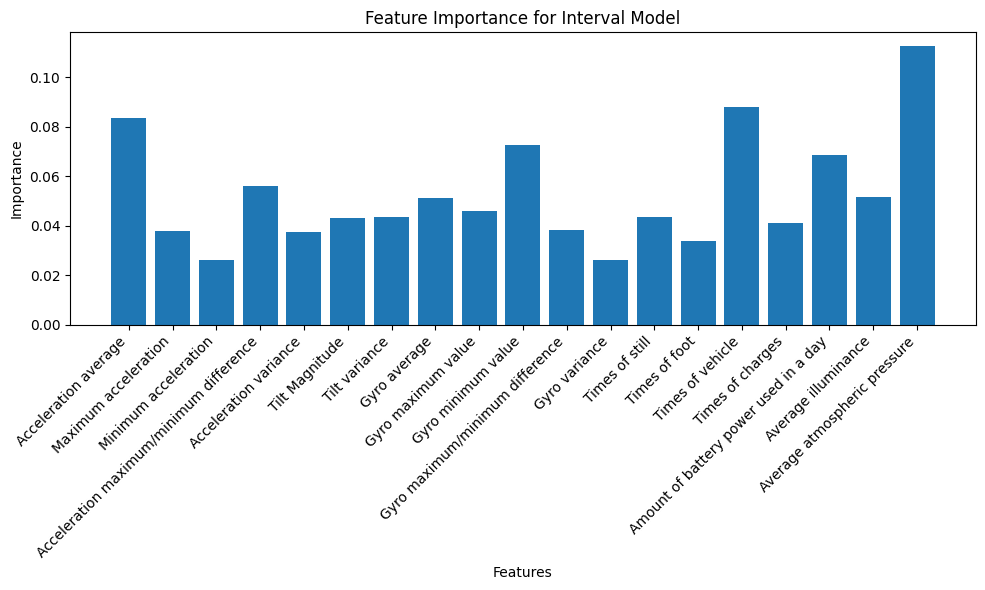

Classification Report for Fluctuation Model:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.33      0.33      0.33         3

    accuracy                           0.50         8
   macro avg       0.47      0.47      0.47         8
weighted avg       0.50      0.50      0.50         8

F1-Score for Fluctuation Model: 0.4666666666666667


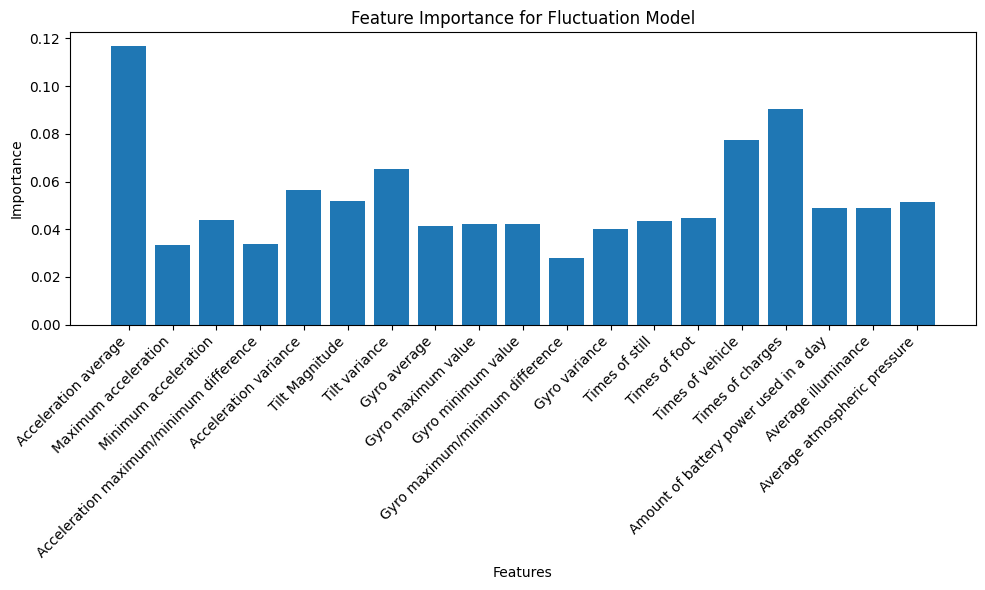

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import LeaveOneOut

# Hyperparameters
n_estimators = 100
criterion = "gini"
max_depth = None

# Features and Targets
X = df.drop(['PANAS_Change','PANAS_Interval', 'Above_Avg','Positive Panas Score'], axis=1)
y_interval = df['PANAS_Interval']  # Target for Interval Model
y_fluctuation = df['PANAS_Change']  # Target for Fluctuation Model

# Function to train, evaluate, and show feature importance
def train_evaluate_plot(X, y, model_name):
    loo = LeaveOneOut()
    y_true, y_pred = [], []
    feature_importance_list = []

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Initialize Random Forest Classifier
        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            criterion=criterion,
            max_depth=max_depth,
            random_state=42
        )
        clf.fit(X_train, y_train)

        # Collect feature importances for averaging
        feature_importance_list.append(clf.feature_importances_)

        # Predict for the test set
        pred = clf.predict(X_test)
        y_true.append(y_test.values[0])
        y_pred.append(pred[0])

    # Evaluation
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, zero_division=0))
    print(f"F1-Score for {model_name}: {f1_score(y_true, y_pred, average='macro')}")

    # Plot Feature Importance
    avg_feature_importance = np.mean(feature_importance_list, axis=0)
    plt.figure(figsize=(10, 6))
    plt.bar(X.columns, avg_feature_importance)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Feature Importance for {model_name}")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

# Train, evaluate, and plot for Interval Model
train_evaluate_plot(X, y_interval, "Interval Model")

# Train, evaluate, and plot for Fluctuation Model
train_evaluate_plot(X, y_fluctuation, "Fluctuation Model")
